As criptomoedas representam uma inovação disruptiva no cenário financeiro global, oferecendo uma abordagem descentralizada e digital para transações financeiras. O conceito de criptomoedas começou a ganhar destaque com o lançamento do Bitcoin em 2009 por uma entidade (ou pessoa) conhecida como Satoshi Nakamoto. Desde então, inúmeras outras criptomoedas foram desenvolvidas, cada uma com características distintas, mas todas compartilhando o princípio fundamental de operar em uma rede descentralizada de blockchain.

A tecnologia por trás das criptomoedas, o blockchain, é um registro distribuído que armazena de forma segura todas as transações realizadas. Isso elimina a necessidade de uma autoridade central, como um banco ou governo, para validar as transações, tornando o processo mais eficiente, transparente e resistente à manipulação.

Vamos inicar instalando as bibliotecas necessárias para trabalhar com os dados.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
import nbformat

Aqui criamos um dataframe para cada uma das criptomoedas que iremos analisar.

In [3]:
btc = pd.read_csv('BTC-USD.csv')
eth = pd.read_csv('ETH-USD.csv')
ada = pd.read_csv('ADA-USD.csv')

Vamos construir uma classe que vai padronizar a criação de plots para cada uma das criptomoedas, a ideia aqui é criar um grafico que mostre o comportamento do valor fechado e do volume durante um ano.

In [4]:
class Cripto:
    def __init__(self, df):
        self.df = df
    def get_plot_close(self, eixox, eixoy, title):
        y = self.df['Close']
        x = self.df['Date']
        plt.plot(x, y)
        x_labels = [1, 91, 182, 273, 365]
        plt.xticks(x_labels, ['2022-11-07', '2023-02-07', '2023-05-07', '2023-08-07', '2023-11-06'])
        plt.xlabel(eixox)
        plt.ylabel(eixoy)
        plt.title(title)
        plt.show()
    def get_plot_volume(self, eixox, eixoy, title):
        y = self.df['Volume']
        x = self.df['Date']
        plt.plot(x, y, color='r')
        x_labels = [1, 91, 182, 273, 365]
        plt.xticks(x_labels, ['2022-11-07', '2023-02-07', '2023-05-07', '2023-08-07', '2023-11-06'])
        plt.xlabel(eixox)
        plt.ylabel(eixoy)
        plt.title(title)
        plt.show()


Agora vamos criar uma classe para comparar a variação do valor das moedas e criar um unico grafico unindo essas varianças, a ideia aqui é mostrar como as outras criptomoedas se comportam em relação a influência do Bitcoin.

In [5]:
class TwoCripto:
    def __init__(self, df1, df2):
        self.df1 = df1
        self.df2 = df2
    def get_two_plot_close(self, df1_name, df2_name):
        self.df1['Valor_Normalizado'] = (self.df1['Close'] - self.df1['Close'].mean()) / self.df1['Close'].std()
        self.df2['Valor_Normalizado'] = (self.df2['Close'] - self.df2['Close'].mean()) / self.df2['Close'].std()
        
        sns.set(style="darkgrid")

        sns.lineplot(x='Date', y='Valor_Normalizado', data=self.df1, label=df1_name)
        sns.lineplot(x='Date', y='Valor_Normalizado', data=self.df2, label=df2_name)

        x_labels = [1, 91, 182, 273, 365]
        plt.xticks(x_labels, ['2022-11-07', '2023-02-07', '2023-05-07', '2023-08-07', '2023-11-06'])
        plt.xlabel('Data')
        plt.ylabel('Variação Normalizada')
        plt.title('Variação Normalizada ao Longo do Tempo')
        plt.legend()
        plt.show()

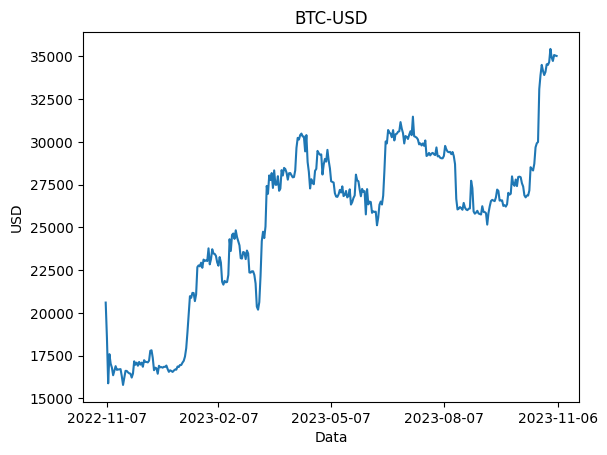

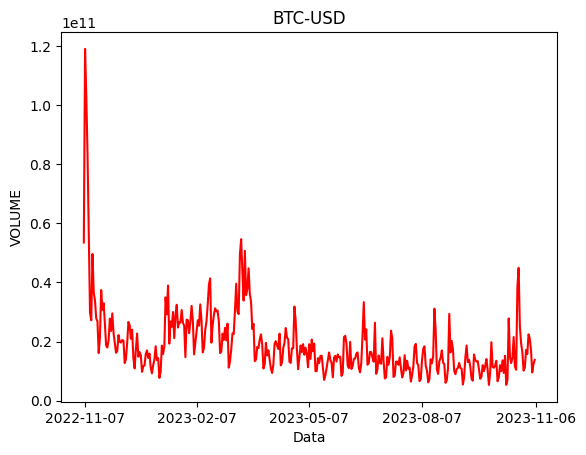

In [6]:
new_btc = Cripto(btc)
new_btc.get_plot_close('Data', 'USD', 'BTC-USD')
new_btc.get_plot_volume('Data', 'VOLUME', 'BTC-USD')

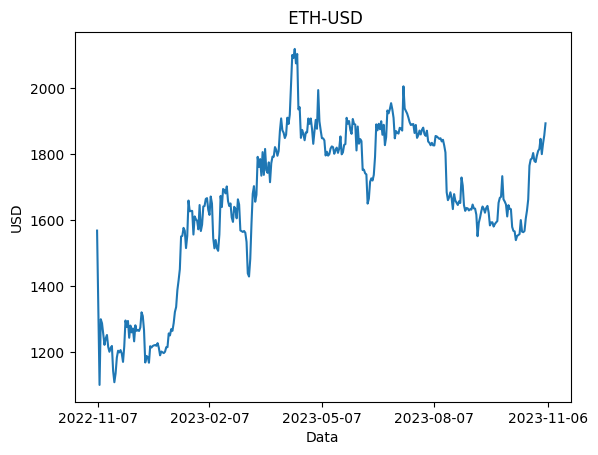

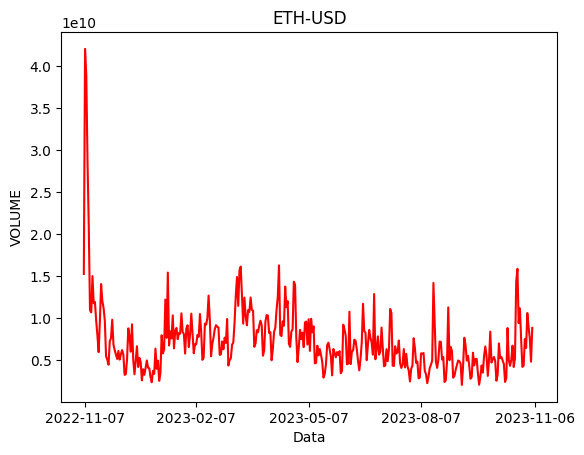

In [7]:
new_eth = Cripto(eth)
new_eth.get_plot_close('Data', 'USD', ' ETH-USD')
new_eth.get_plot_volume('Data', 'VOLUME', 'ETH-USD')

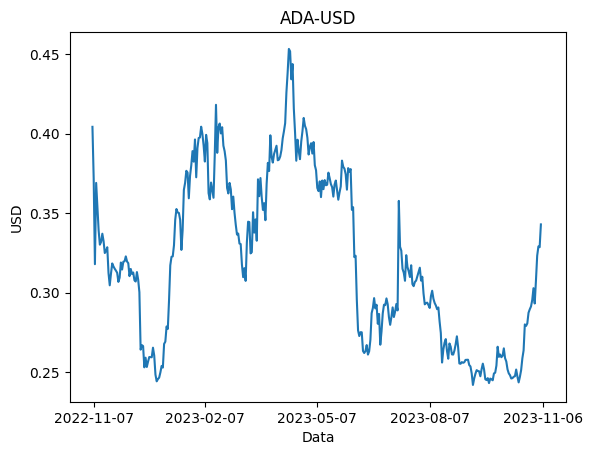

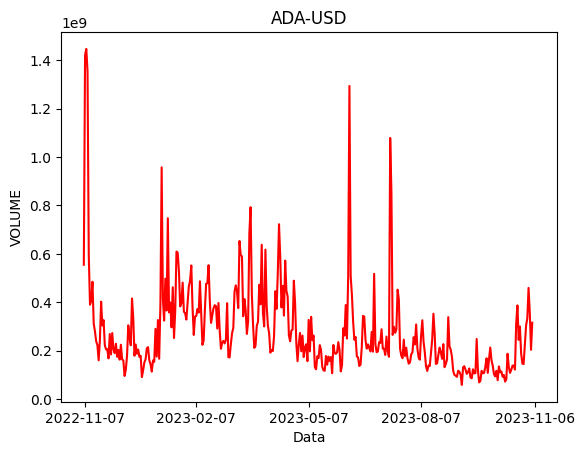

In [8]:
new_ada = Cripto(ada)
new_ada.get_plot_close('Data', 'USD', 'ADA-USD')
new_ada.get_plot_volume('Data', 'VOLUME', 'ADA-USD')

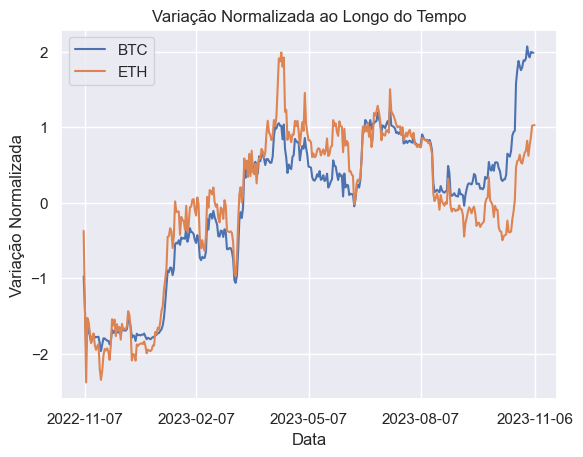

In [9]:
btc_eth = TwoCripto(btc, eth)
btc_eth.get_two_plot_close('BTC', 'ETH')

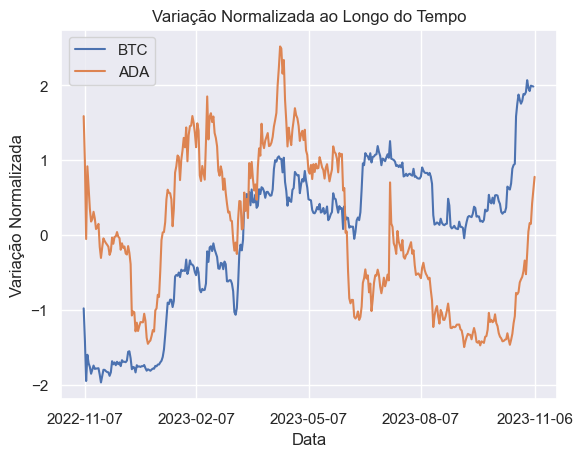

In [10]:
btc_eth = TwoCripto(btc, ada)
btc_eth.get_two_plot_close('BTC', 'ADA')

Agora vamos criar um modelo de previsão do preço do Bitcoin usando os dados do dataframe "btc".

In [11]:
btc.dropna()
price_volume_df = btc[['Date','Close', 'Volume']]

In [12]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title=title)
  for i in df.columns[1:]:
    fig.add_scatter(x=df['Date'], y=df[i], name=i)
  fig.show()

In [13]:
def trading_window(data):
    n=1
    data['Target'] = data[['Close']].shift(-n)
    return data
target_df = trading_window(price_volume_df)
target_df.drop(364)

,Date,Close,Volume,Target
0,2022-11-07,20602.816406,53510852236,18541.271484
1,2022-11-08,18541.271484,118992465607,15880.780273
2,2022-11-09,15880.780273,102905151606,17586.771484
3,2022-11-10,17586.771484,83202283721,17034.292969
4,2022-11-11,17034.292969,55871616488,16799.185547
...,...,...,...,...
359,2023-11-01,35437.253906,22446272005,34938.242188
360,2023-11-02,34938.242188,20998158544,34732.324219
361,2023-11-03,34732.324219,17158456701,35082.195313
362,2023-11-04,35082.195313,9561294264,35049.355469


In [14]:
sc = MinMaxScaler(feature_range= (0,1))
scaled_df = sc.fit_transform(target_df.drop(columns='Date'))
scaled_df = scaled_df[~np.any(np.isnan(scaled_df), axis=1)]

In [15]:
# Create Feature and Target
X = scaled_df[:, :2]
y = scaled_df[:, 2:]

# split the data in 70% training and 30% testing
split = int(0.7 * (len(X)))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]


In [16]:
model = Ridge()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print('Ridge Regression score:', accuracy)

Ridge Regression score: 0.9463225827569769


In [17]:
# Price predicting
predicted_price = model.predict(X)

# add the predicted values into a list
Predicted = []
for i in predicted_price:
  Predicted.append(i[0])

# Append the close values to the list
close = []
for i in scaled_df:
  close.append(i[0])

df_predicted = target_df[['Date']]


df_predicted = df_predicted.iloc[:-1]

df_predicted['Close'] = close

df_predicted['Prediction'] = Predicted

# plotting the data
interactive_plot(df_predicted, 'Original Price vs. Ridge Regression Predictions')
